In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




In [ ]:
!gdown 1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS

Downloading...
From: https://drive.google.com/uc?id=1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS
To: /content/insurance.csv
100% 30.8k/30.8k [00:00<00:00, 49.7MB/s]


In [ ]:
# Load data
data = pd.read_csv('insurance.csv')

In [ ]:

# Feature Engineering
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

# Handling Missing Values
data.fillna(data.mean(), inplace=True)

In [ ]:
data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,0.002373
1,60,1,0,0,0,180,73,0,0,0,29000,0.002253
2,36,1,1,0,0,158,59,0,0,1,23000,0.002363
3,52,1,1,0,1,183,93,0,0,2,28000,0.002777
4,38,0,0,0,1,166,88,0,0,1,23000,0.003193


In [ ]:

# Encoding Categorical Variables
encoder = OneHotEncoder(sparse_output=False)  # Set sparse_output to False
encoded_features = encoder.fit_transform(data[['Diabetes', 'BloodPressureProblems']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Diabetes', 'BloodPressureProblems'])) #creating a dataframe from encoded_features
data = pd.concat([data, encoded_df], axis=1) # concatenating the new dataframe to the original data

# Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Age', 'BMI', 'NumberOfMajorSurgeries']])

In [ ]:


# Train-Test Split
X = data.drop('PremiumPrice', axis=1)
y = data['PremiumPrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}, MAE: {mae}, R²: {r2}')

RMSE: 12210927.792979361, MAE: 2586.1817100200606, R²: 0.7136461439649744


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

# Load your data
#data = pd.read_csv('insurance.csv')
X = data.drop('PremiumPrice', axis=1)
y = data['PremiumPrice']

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Baseline performance
baseline_performance = mean_squared_error(y_val, model.predict(X_val))

# Calculate permutation importance
result = permutation_importance(model, X_val, y_val, n_repeats=10, random_state=42)
importance_scores = result.importances_mean

# Create a DataFrame for feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance_scores
}).sort_values(by='Importance', ascending=False)

print(feature_importances)


                    Feature  Importance
0                       Age    1.138550
3            AnyTransplants    0.221333
6                    Weight    0.121089
4        AnyChronicDiseases    0.091145
8   HistoryOfCancerInFamily    0.051022
9    NumberOfMajorSurgeries    0.028460
10                      BMI    0.019719
2     BloodPressureProblems    0.004997
14  BloodPressureProblems_1    0.001622
13  BloodPressureProblems_0    0.000519
11               Diabetes_0    0.000009
1                  Diabetes   -0.000177
12               Diabetes_1   -0.000445
5                    Height   -0.000837
7            KnownAllergies   -0.000927


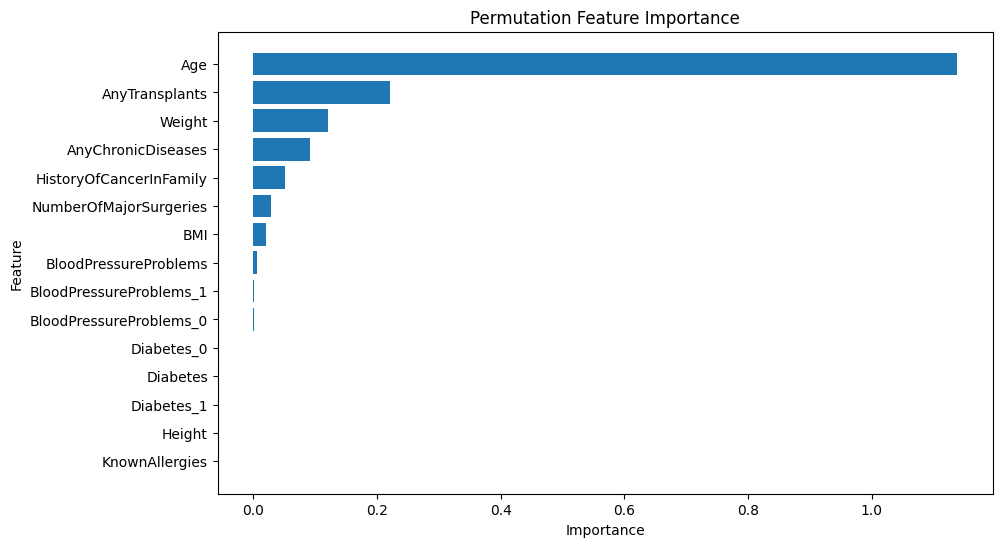

In [ ]:
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance')
plt.gca().invert_yaxis()
plt.show()


**Insights and Actions:**
1. Identified Risk Factors:
High BMI (Body Mass Index): The model shows that customers with a high BMI have significantly higher insurance premiums.

Age: Older customers are associated with higher premiums due to increased health risks.

Chronic Diseases: Presence of chronic diseases like diabetes or high blood pressure leads to higher insurance costs.

Number of Major Surgeries: A higher number of major surgeries in the past correlates with increased premiums.

2. Targeted Interventions:
Health and Wellness Programs:

Objective: Reduce insurance costs by improving customers' health metrics.

Action:

Launch wellness programs focused on weight management and healthy living.

Offer discounts on premiums for participation in fitness programs or achieving specific health goals.

Example: Provide gym membership discounts or partnerships with nutritionists.

Age-Based Plans:

Objective: Tailor insurance plans to different age groups to better address their specific needs and risks.

Action:

Create specialized insurance plans for seniors with added benefits like home healthcare services.

Offer preventive care services and regular health check-ups.

Example: Introduce a "Senior Health Plan" with lower premiums for seniors who undergo regular health screenings.

Chronic Disease Management:

Objective: Manage chronic diseases to reduce their impact on health and insurance costs.

Action:

Implement disease management programs that provide resources and support for managing chronic conditions.

Offer educational resources and support groups for chronic disease patients.

Example: Provide diabetes management programs with regular monitoring and counseling.

Preventive Surgery Benefits:

Objective: Encourage preventive measures to reduce the likelihood of major surgeries.

Action:

Offer benefits for preventive surgeries or procedures that reduce future health risks.

Provide coverage for preventive screenings and early interventions.

Example: Cover the cost of preventive procedures like colonoscopies for early detection of cancer.